# PYTHON IMAGE LIBRARY

https://pillow.readthedocs.io/en/stable/

https://www.geeksforgeeks.org/python-pillow-a-fork-of-pil/  
https://pypi.org/project/Pillow/  
https://www.javatpoint.com/python-pillow  

## PyMoondra

In [38]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#show image with just imshow

In [4]:
# Image object
img1 = Image.open('cat.jpg')
img2 = Image.open('balloons.jpg')

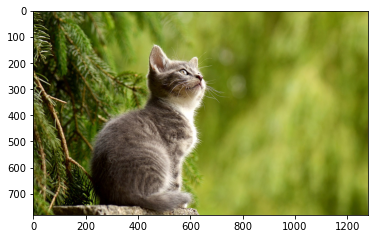

In [3]:
#img1.show()
plt.imshow(img1)

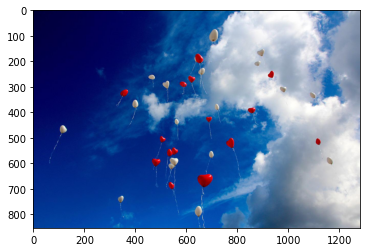

In [4]:
#img2.show()
plt.imshow(img2)

In [10]:
print(img1.size, img1.format, img1.mode, sep='\n')
print()
print(img2.size, img2.format, img2.mode, sep='\n')

(1280, 781)
JPEG
RGB

(1280, 853)
JPEG
RGB


#### SAVE IMAGE OBJECT

In [12]:
img1.save('savedImg1.png')

!ls -l
img1Saved = Image.open('savedImg1.png')
img1Saved.show()

total 10928
-rw-r--r--  1 siddhartha  staff  2799061 Jan 27 18:51 PIL.ipynb
-rw-r--r--  1 siddhartha  staff        8 Jan 24 22:19 README.md
-rw-r--r--  1 siddhartha  staff   367112 Jan 24 22:19 arial.ttf
-rw-r--r--  1 siddhartha  staff    70859 Jan 24 22:19 balloons.jpg
-rw-r--r--  1 siddhartha  staff   243102 Jan 24 22:19 cat.jpg
-rw-r--r--  1 siddhartha  staff  1379981 Jan 27 18:53 savedImg1.png


#### CROP

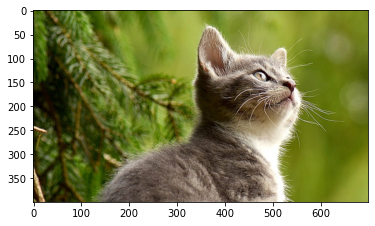

In [7]:
left = 100
top = 100
right = 800
bottom = 500
imgCrop = img1.crop((left, top, right, bottom))
plt.imshow(imgCrop)

#### COPY

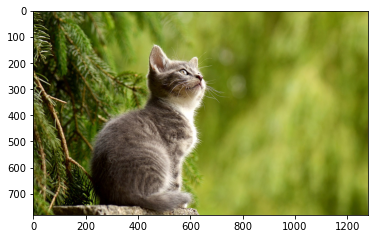

In [8]:
imgCopy = img1.copy()
plt.imshow(imgCopy)

#### TRANSPOSING

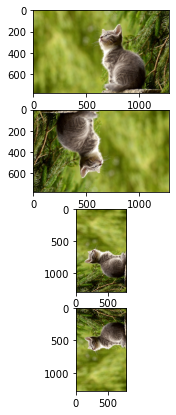

In [22]:
fig = plt.figure(figsize=(10,7))
# display as 2,2
rows = 2
columns = 2
# Flip image across x-axis && y-axis
transposed_img1 = img1.transpose(Image.FLIP_LEFT_RIGHT)
fig.add_subplot(rows, columns, 1)
plt.imshow(transposed_img1)
transposed_img2 = img1.transpose(Image.FLIP_TOP_BOTTOM)
fig.add_subplot(rows, columns, 2)
plt.imshow(transposed_img2)

# Rotate 90, 180, 270
transposed_img3 = img1.transpose(Image.ROTATE_90)
fig.add_subplot(rows, columns, 3)
plt.imshow(transposed_img3)

# Transpose image
transposed_img4 = img1.transpose(Image.TRANSPOSE)
fig.add_subplot(rows, columns, 4)
plt.imshow(transposed_img4)

#### MIRROR

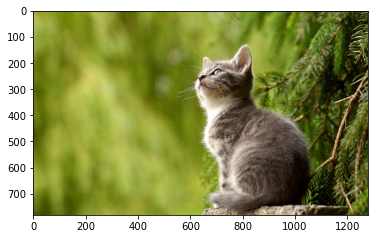

In [5]:
mirror_img = ImageOps.mirror(img1)
plt.imshow(mirror_img)

#### FLIP

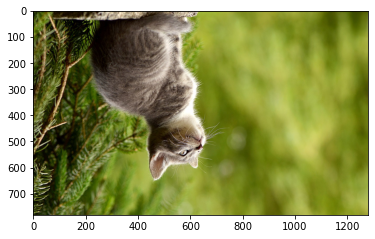

In [7]:
flip_img = ImageOps.flip(img1)
plt.imshow(flip_img)

#### BORDER

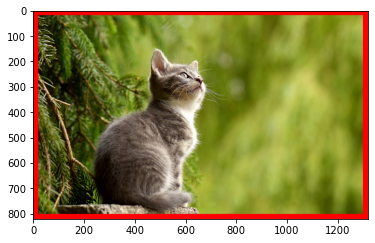

In [9]:
image_with_border = ImageOps.expand(img1, border=20, fill='red')
plt.imshow(image_with_border)

#### RESIZING

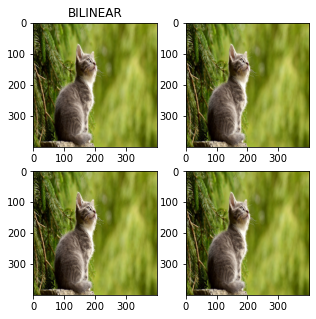

In [29]:
fig = plt.figure(figsize=(5,5))

newSize = (400,400)
fig.add_subplot(2,2,1)
resized_img1 = img1.resize(newSize, resample=Image.BILINEAR)
plt.imshow(resized_img1)
plt.title('BILINEAR')

newSize = (400,400)
fig.add_subplot(2,2,2)
resized_img2 = img1.resize(newSize, resample=Image.BOX)
plt.imshow(resized_img2)

newSize = (400,400)
fig.add_subplot(2,2,3)
resized_img3 = img1.resize(newSize, resample=Image.NEAREST)
plt.imshow(resized_img3)

newSize = (400,400)
fig.add_subplot(2,2,4)
resized_img4 = img1.resize(newSize, resample=Image.HAMMING)
plt.imshow(resized_img4)

#### ROTATE

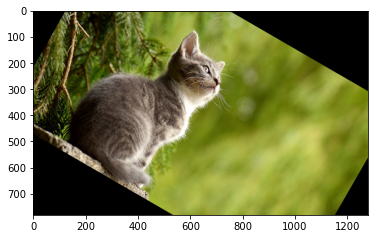

In [32]:
rotate_img = img1.rotate(angle= -30)
plt.imshow(rotate_img)

#### TEXT WATERMARKS

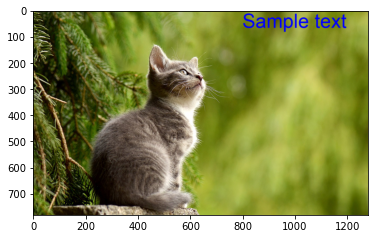

In [49]:
from PIL import ImageFont
from PIL import ImageDraw

watermarked_image = img1.copy()
draw = ImageDraw.Draw(watermarked_image)    # make image editable
font = ImageFont.truetype("arial.ttf", 75)

draw.text((800,0), "Sample text", (0,0,255), font=font)
plt.imshow(watermarked_image)

#### IMAGE WATERMARKS

#### BLACK AND WHITE

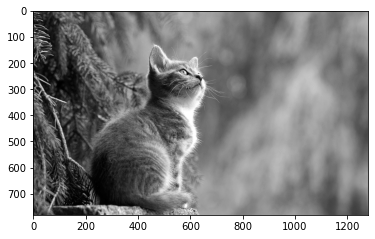

In [52]:
bw_image = img1.convert('L')
plt.imshow(bw_image, cmap='gray')

#### DIFFERENT FORMATS

In [57]:
hsv_image = img1.convert('HSV')
print(img1.mode)
print(hsv_image.mode)

RGB
HSV


#### CONVERT TO NUMPY FORMAT

In [71]:
#print(img1)
numpy_array = np.array(img1)
print(img1.size)     # width x height
print(numpy_array.shape)     # height x width
#print(numpy_array)

(1280, 781)
(781, 1280, 3)


#### BACK TO IMAGE

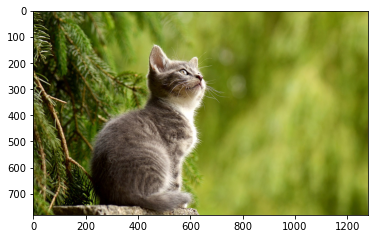

In [69]:
numpy_image = Image.fromarray(numpy_array)
plt.imshow(numpy_image)

#### IMAGE ENHANCEMENT

Text(0.5, 1.0, 'SHARPNESS')

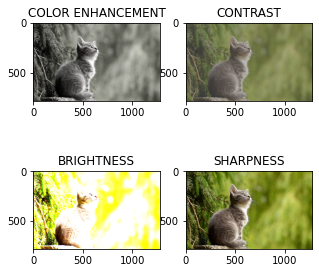

In [86]:
plt.figure(figsize=(5,5))
image_color_enhance = img1.copy()
from PIL import ImageEnhance

image1 = ImageEnhance.Color(image_color_enhance).enhance(0.1)
plt.subplot(2,2,1)
plt.imshow(image1)
plt.title('COLOR ENHANCEMENT')

image2 = ImageEnhance.Contrast(image_color_enhance).enhance(0.5)
plt.subplot(2,2,2)
plt.imshow(image2)
plt.title('CONTRAST')

image3 = ImageEnhance.Brightness(image_color_enhance).enhance(4.5)
plt.subplot(2,2,3)
plt.imshow(image3)
plt.title('BRIGHTNESS')

image4 = ImageEnhance.Sharpness(image_color_enhance).enhance(5.5)
plt.subplot(2,2,4)
plt.imshow(image4)
plt.title("SHARPNESS")

#### ALPHA BLENDING

https://www.geeksforgeeks.org/python-pil-blend-method/

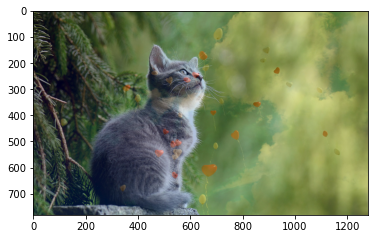

In [89]:
# MIXING OF TWO IMAGES
b_image1 = img1.copy()
b_image2 = img2.copy().resize(img1.size)

blend_image = Image.blend(b_image1, b_image2, 0.3)
plt.imshow(blend_image)

#### COMPOSITE

In [21]:
# SIMILAR TO BLEND (USING POINT AND COMPOSITE METHOD)
Image.composite?

#### IMAGE TRANSFORM

#### FLIPPING CHANNELS

RGB
RGB
RGB


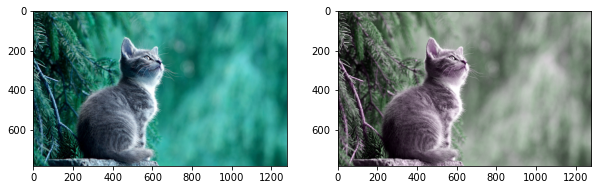

In [17]:
image_channels = img1.copy()
print(img1.mode)

r, g, b = image_channels.split()
im1 = Image.merge("RGB", (b, g, r))
im2 = Image.merge("RGB", (r, g, r))

plt.figure(figsize=(10,10))
# In bgr
plt.subplot(1,2,1)
plt.imshow(im1)
print(im1.mode)
plt.subplot(1,2,2)
plt.imshow(im2)
print(im2.mode)

#### FILTERS

In [10]:
from PIL import ImageFilter

'\nOther filters:\nBLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE, EMBOSS, SMOOTH, SMOOTH_MORE, FIND_EDGES, SHARPEN\n'

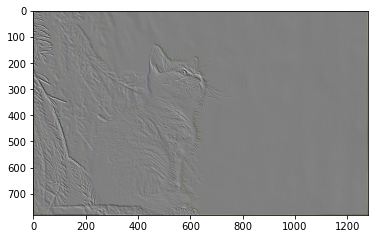

In [13]:
blur_image = img1.filter(ImageFilter.EMBOSS)
plt.imshow(blur_image)
'''
Other filters:
BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE, EMBOSS, SMOOTH, SMOOTH_MORE, FIND_EDGES, SHARPEN
'''

In [20]:
Image.blend?

## Corey Schafer

APPLICATION

In [19]:
#  SAVE IMAGES AS

from PIL import Image
import os

for f in os.listdir('.'):
    if f.endswith('.jpg'):
        i = Image.open(f)
        fname, fexten = os.path.splitext(f)
        #print(fname, fexten)
        i.save('png/{}.png'.format(fname))
        
for f in os.listdir('./png'):
    print(f)

cat.png
balloons.png


In [25]:
#  RESIZE IMAGES

from PIL import Image
import os

size = (300,300)

for f in os.listdir('.'):
    if f.endswith('.jpg'):
        i = Image.open(f)
        fname, fexten = os.path.splitext(f)
        
        i.thumbnail(size)
        i.save('300/{}_300{}'.format(fname, fexten))
        
for f in os.listdir('./300'):
    print(f)

balloons_300.jpg
cat_300.jpg


## Ryan Noonan

In [28]:
from PIL import Image, ImageEnhance, ImageOps, ImageDraw, ImageFilter
import glob

In [39]:
# Resize multiple Images, (using glob)

size = (300,300)

for i, filename in enumerate(glob.glob('./*.jpg')):
    print(filename)
    img = Image.open(filename).resize(size)
    img.save('{}{}{}'.format('./300/resized', i+1, '.jpeg'))

./cat.jpg
./balloons.jpg


In [37]:
!ls -l 300/

total 104
-rw-r--r--@ 1 siddhartha  staff   8487 Jan 27 19:33 balloons_300.jpg
-rw-r--r--  1 siddhartha  staff  10324 Jan 27 19:33 cat_300.jpg
-rw-r--r--  1 siddhartha  staff  15416 Jan 27 19:39 resized1.jpeg
-rw-r--r--  1 siddhartha  staff  11380 Jan 27 19:39 resized2.jpeg


@ 7:00